<div align="center">

# Decoding Hit Potential:
## Predicting Song Popularity Through Its Musical Characteristics

</div>

---
**Author:** *your-name*  
**Date:** *date of submission*  
**Dataset:** `.csv`  
**Objective:**  
✔ <br>
✔ <br> 
✔ 

### Problem Statement:

### Libraries:

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

###  Explore The Data

#### Information About The Available Features:

In [324]:
# Load the dataset
df = pd.read_csv('car-data.csv')

In [325]:
df.columns.str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^\w_]', '', regex=True)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Feature Scaling

In [9]:
# Select the features you want to use for prediction
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms']

In [10]:
# Target variable (this is what we're predicting)
target = 'track_popularity'

In [11]:
# Extract the feature columns and target column
X = df[features]
y = df[target]

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Splitting Training and Testing Sets

In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Display shape
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (26262, 12)
Testing set shape: (6566, 12)


In [326]:
# Drop unnecessary columns
df.drop(columns=['car_ID', 'CarName'], inplace=True)

In [327]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [328]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [329]:
# Check for missing values in the dataset
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [334]:
# Select relevant columns
features = df.select_dtypes(exclude=['object']).columns
target = 'price'

In [335]:
# Separate features and target
X = data[features]
y = data[target]

In [336]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [338]:
# Initialize the KNN regressor with an optimal number of neighbors (k)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [339]:
# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 14461964.872085094
R-squared: 0.8168073438502591


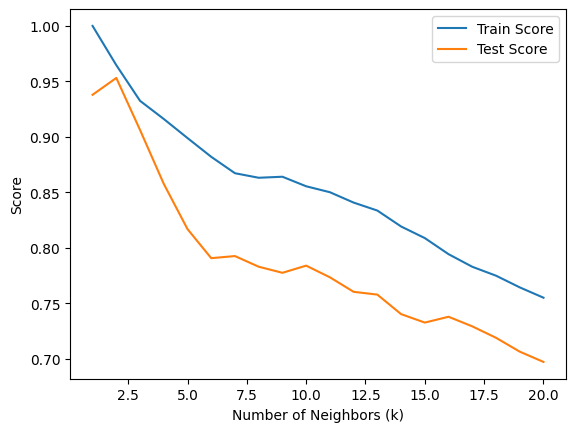

In [340]:
# Try different values of k and evaluate performance
neighbors = list(range(1, 21))
train_scores = []
test_scores = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Evaluate the performance on both train and test data
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot the performance of different values of k
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.show()


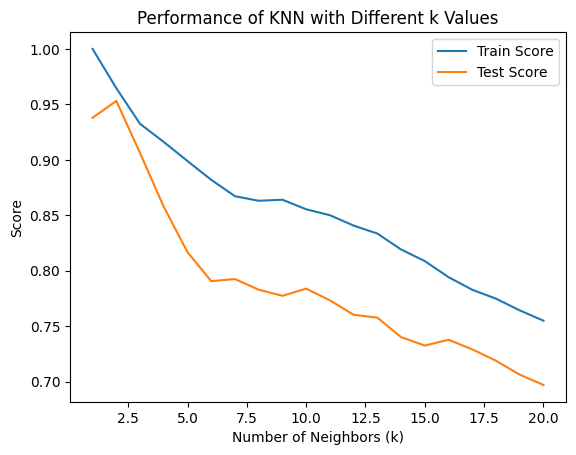

In [341]:
# Plot the performance of different values of k
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.title('Performance of KNN with Different k Values')
plt.show()
